# Case-Study 1 (Decision Tree,Randome Forest,KNN,NB)

Consider The Wisconsin Breast Cancer Database. 

This dataset consists of 10 continuous attributes and 1 target class attribute. 

Class attribute shows the observation result, whether the patient is suffering from the benign tumor or malignant tumor. 

Benign tumors do not spread to other parts while the malignant tumor is cancerous. 

Breast Cancer Data Set Attribute Information:
1. Sample code number: id number
2. Clump Thickness: 1 – 10
3. Uniformity of Cell Size: 1 – 10
4. Uniformity of Cell Shape: 1 – 10
5. Marginal Adhesion: 1 – 10
6. Single Epithelial Cell Size: 1 – 10
7. Bare Nuclei: 1 – 10
8. Bland Chromatin: 1 – 10
9. Normal Nucleoli: 1 – 10
10. Mitoses: 1 – 10
11. Class: (2 for benign, 4 for malignant)

### 1.2 Import the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1.3 Load the dataset

In [2]:
df = pd.read_csv('cancer.csv')

### 1.4 Check the data type for dataset?

In [3]:
df.dtypes

id                     int64
diagnosis             object
radius_mean          float64
texture_mean         float64
perimeter_mean       float64
area_mean            float64
smoothness_mean      float64
compactness_mean     float64
concavity_mean       float64
points_mean          float64
symmetry_mean        float64
dimension_mean       float64
radius_se            float64
texture_se           float64
perimeter_se         float64
area_se              float64
smoothness_se        float64
compactness_se       float64
concavity_se         float64
points_se            float64
symmetry_se          float64
dimension_se         float64
radius_worst         float64
texture_worst        float64
perimeter_worst      float64
area_worst           float64
smoothness_worst     float64
compactness_worst    float64
concavity_worst      float64
points_worst         float64
symmetry_worst       float64
dimension_worst      float64
dtype: object

### 1.5 Check the data.describe for dataset?

In [5]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


### 1.6 Check the data.groupby count for diagnosis?

In [6]:
df.groupby('diagnosis').agg({'diagnosis': 'count'})

,diagnosis
diagnosis,
B,357
M,212


### 1.7 drop the first column from the data frame. This is Id column which is not used in modeling?

In [7]:
df = df.drop(columns = 'id')
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,0.1959,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,0.1922,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,0.1714,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,0.1771,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,0.1721,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,B,13.17,18.22,84.28,537.3,0.07466,0.05994,0.04859,0.02870,0.1454,...,14.90,23.89,95.10,687.6,0.1282,0.1965,0.18760,0.10450,0.2235,0.06925
565,B,10.26,14.71,66.20,321.6,0.09882,0.09159,0.03581,0.02037,0.1633,...,10.88,19.48,70.89,357.1,0.1360,0.1636,0.07162,0.04074,0.2434,0.08488
566,M,15.28,22.41,98.92,710.6,0.09057,0.10520,0.05375,0.03263,0.1727,...,17.80,28.03,113.80,973.1,0.1301,0.3299,0.36300,0.12260,0.3175,0.09772
567,B,14.53,13.98,93.86,644.2,0.10990,0.09242,0.06895,0.06495,0.1650,...,15.80,16.93,103.10,749.9,0.1347,0.1478,0.13730,0.10690,0.2606,0.07810


### 1.8 Create a separate dataframe consisting only of the features i.e independent attributes

In [9]:
df1 = df.drop(columns = 'diagnosis')
df1

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,0.1959,0.05955,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,0.1922,0.06491,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,0.1714,0.06340,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,0.1771,0.06072,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,0.1721,0.05544,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,13.17,18.22,84.28,537.3,0.07466,0.05994,0.04859,0.02870,0.1454,0.05549,...,14.90,23.89,95.10,687.6,0.1282,0.1965,0.18760,0.10450,0.2235,0.06925
565,10.26,14.71,66.20,321.6,0.09882,0.09159,0.03581,0.02037,0.1633,0.07005,...,10.88,19.48,70.89,357.1,0.1360,0.1636,0.07162,0.04074,0.2434,0.08488
566,15.28,22.41,98.92,710.6,0.09057,0.10520,0.05375,0.03263,0.1727,0.06317,...,17.80,28.03,113.80,973.1,0.1301,0.3299,0.36300,0.12260,0.3175,0.09772
567,14.53,13.98,93.86,644.2,0.10990,0.09242,0.06895,0.06495,0.1650,0.06121,...,15.80,16.93,103.10,749.9,0.1347,0.1478,0.13730,0.10690,0.2606,0.07810


### 1.9 convert the features into z scores as we do not know what units / scales were used and store them in new dataframe

It is always adviced to scale numeric attributes in models that calculate distances.

In [10]:
from scipy.stats import zscore
df1 = df1.apply(lambda x : zscore(x))
df1

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,-0.513297,-1.605595,-0.540376,-0.542624,0.458285,-0.654413,-0.614306,-0.307442,0.538081,-0.460382,...,-0.573451,-1.634499,-0.604391,-0.582718,0.268776,-0.812128,-0.709978,-0.315133,-0.119321,-0.899721
1,-1.001801,-0.079038,-0.934566,-0.877375,0.036986,0.196319,-0.312987,-0.580343,0.402996,0.299453,...,-0.908925,-0.445740,-0.863230,-0.801227,-0.485202,-0.017590,-0.386625,-0.538203,0.063489,-0.447528
2,-0.876835,-0.572377,-0.867014,-0.801153,0.806996,-0.498443,-0.732448,-0.622129,-0.356400,0.085395,...,-0.799171,0.124213,-0.814083,-0.719308,0.198638,-0.674722,-0.793935,-0.613574,0.157320,-0.284606
3,-0.808671,-1.372888,-0.781338,-0.768161,1.426135,0.175472,-0.532950,-0.024740,-0.148296,-0.294523,...,-0.900641,-1.613330,-0.915355,-0.785054,0.189871,-0.458434,-0.889933,-0.433901,-1.292212,-0.892517
4,0.301824,-1.414775,0.234000,0.161860,-1.190618,-0.663320,-0.688883,-0.576473,-0.330843,-1.043018,...,-0.014328,-1.619844,-0.082245,-0.108082,-0.866574,-0.512506,-0.652408,-0.499832,-0.669366,-0.902492
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,-0.271884,-0.248914,-0.316713,-0.334435,-1.544310,-0.841464,-0.504827,-0.521532,-1.305645,-1.035930,...,-0.283535,-0.291038,-0.362232,-0.339247,-0.182734,-0.367466,-0.405815,-0.153883,-1.077047,-0.814381
565,-1.098366,-1.065715,-1.061432,-0.947908,0.175047,-0.241650,-0.665279,-0.736396,-0.652127,1.028102,...,-1.116007,-1.009179,-1.083347,-0.920238,0.159186,-0.576756,-0.962232,-1.124731,-0.755108,0.051769
566,0.327386,0.726127,0.286312,0.158448,-0.412068,0.016280,-0.440043,-0.420162,-0.308938,0.052790,...,0.317004,0.383135,0.194763,0.162637,-0.099446,0.481144,0.435670,0.121718,0.443667,0.763308
567,0.114375,-1.235591,0.077889,-0.030401,0.963560,-0.225920,-0.249208,0.413500,-0.590060,-0.225060,...,-0.097161,-1.424431,-0.123945,-0.229730,0.102199,-0.677266,-0.647131,-0.117340,-0.476850,-0.323951


### 1.10 Capture the class values from the 'diagnosis' colum.

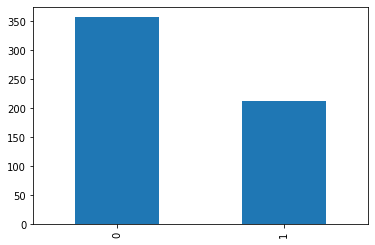

In [20]:
from sklearn.preprocessing import LabelEncoder
ll = LabelEncoder()
df['diagnosis'] = ll.fit_transform(df['diagnosis'])
df['diagnosis'].value_counts().plot.bar()
plt.show()

### 1.11 Extract the independent variable X and dependent variable Y?

In [21]:
X = df.drop(columns = 'diagnosis')
y = df['diagnosis']

### 1.12 Split the data into train and test set:(70/30)

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, test_size = 0.3)

In [23]:
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

## 1.13 Import all the algorithms we want to test

In [26]:
def algomodel(algo, X_train, y_train, X_test, y_test):
    algo.fit(X_train, y_train)
    
    y_pred_train = algo.predict(X_train)
    y_pred_test = algo.predict(X_test)
    
    y_prob_train = algo.predict_proba(X_train)[:,1]
    y_prob_test = algo.predict_proba(X_test)[:,1]
    
    a = accuracy_score(y_train, y_pred_train)
    b = accuracy_score(y_test, y_pred_test)
    
    c = roc_auc_score(y_train, y_prob_train)
    d = roc_auc_score(y_test, y_prob_test)
    
    return np.array([a,b,c,d])

In [27]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
algomodel(dt, X_train, y_train, X_test, y_test)

array([1.        , 0.93567251, 1.        , 0.93421053])

In [28]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
algomodel(rfc, X_train, y_train, X_test, y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([0.99497487, 0.95321637, 0.99988053, 0.97537704])

In [33]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [38]:
Xs = ss.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state =1)

X_trains = ss.fit_transform(X_train)
X_tests = ss.transform(X_test)

In [43]:
def knnmodel(knnalgo, X_trains, y_train, X_tests, y_test):
    knnalgo.fit(X_trains, y_train)

    y_pred_train = knnalgo.predict(X_trains)
    y_pred_test = knnalgo.predict(X_tests)
    
    y_prob_train = knnalgo.predict_proba(X_trains)[:,1]
    y_prob_test = knnalgo.predict_proba(X_tests)[:,1]
    
    a = accuracy_score(y_train, y_pred_train)
    b = accuracy_score(y_test, y_pred_test)
    
    c = roc_auc_score(y_train, y_prob_train)
    d = roc_auc_score(y_test, y_prob_test)
    
    return np.array([a,b,c,d])

In [44]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knnmodel(knn, X_trains, y_train, X_tests, y_test)

array([0.97738693, 0.96491228, 0.99819461, 0.98645737])

In [45]:
from sklearn.ensemble import VotingClassifier
clf = VotingClassifier(estimators = [('dt', dt), ('rfc', rfc), ('knn', knn)], voting = 'soft')
algomodel(clf, X_train, y_train, X_test, y_test)

array([1.        , 0.94736842, 1.        , 0.98068637])

#### 1.13a) Prepare an array with all the algorithms

In [46]:
print('DT:', algomodel(dt, X_train, y_train, X_test, y_test))

print('RFC:', algomodel(rfc, X_train, y_train, X_test, y_test))

print('KNN:', knnmodel(knn, X_trains, y_train, X_tests, y_test))

print('VotingClassifier:', algomodel(clf, X_train, y_train, X_test, y_test))

DT: [1.         0.94736842 1.         0.94298246]
RFC: [1.         0.96491228 1.         0.98314866]
KNN: [0.97738693 0.96491228 0.99819461 0.98645737]
VotingClassifier: [1.         0.95321637 1.         0.98022468]


####  1.13 b) Prepare the configuration to run the (X,Y),seed=7

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 7, test_size = 0.3)

In [54]:
dt1 = DecisionTreeClassifier(random_state = 7)
algomodel(dt1, X_train, y_train, X_test, y_test)

array([1.        , 0.92982456, 1.        , 0.91713525])

In [55]:
rfc1 = RandomForestClassifier(random_state = 7)
algomodel(rfc1, X_train, y_train, X_test, y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([0.99497487, 0.95321637, 1.        , 0.98505475])

In [56]:
knn1 = KNeighborsClassifier()
knnmodel(knn1, X_trains, y_train, X_tests, y_test)

array([0.71105528, 0.57894737, 0.77604839, 0.54712933])

In [57]:
clf1 = VotingClassifier(estimators = [('dt', dt), ('rfc', rfc), ('knn', knn)], voting = 'soft')
algomodel(clf1, X_train, y_train, X_test, y_test)

array([1.        , 0.94736842, 1.        , 0.98579461])

#### 1.13 c) Every algorithm is tested and results are collected and printed?


In [58]:
print('DT1:', algomodel(dt1, X_train, y_train, X_test, y_test))

print('RFC1:', algomodel(rfc1, X_train, y_train, X_test, y_test))

print('KNN1:', knnmodel(knn1, X_trains, y_train, X_tests, y_test))

print('VotingClassifier1:', algomodel(clf1, X_train, y_train, X_test, y_test))

DT1: [1.         0.92982456 1.         0.91713525]
RFC1: [0.99497487 0.95321637 1.         0.98505475]
KNN1: [0.71105528 0.57894737 0.77604839 0.54712933]
VotingClassifier1: [1.         0.94736842 1.         0.98579461]


#### 1.13 d) boxplot algorithm comparison

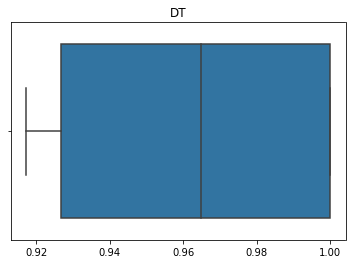

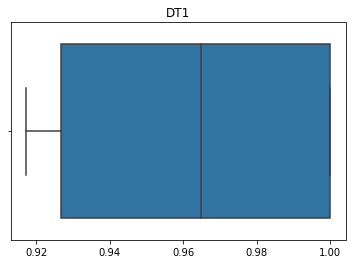

In [60]:
sns.boxplot(algomodel(dt, X_train, y_train, X_test, y_test))
plt.title('DT')
plt.show()
sns.boxplot(algomodel(dt1, X_train, y_train, X_test, y_test))
plt.title('DT1')
plt.show()

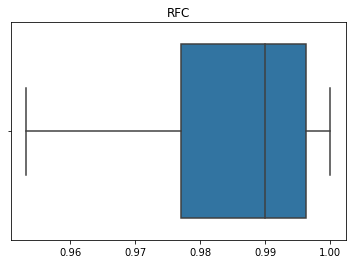

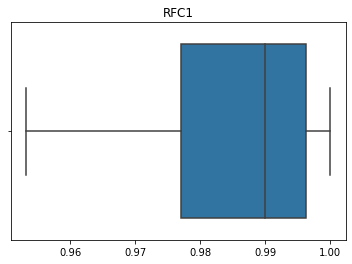

In [61]:
sns.boxplot(algomodel(rfc, X_train, y_train, X_test, y_test))
plt.title('RFC')
plt.show()
sns.boxplot(algomodel(rfc1, X_train, y_train, X_test, y_test))
plt.title('RFC1')
plt.show()

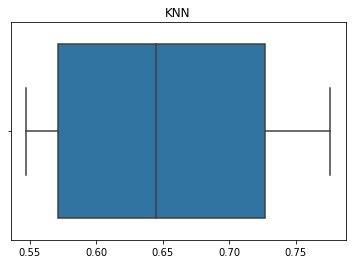

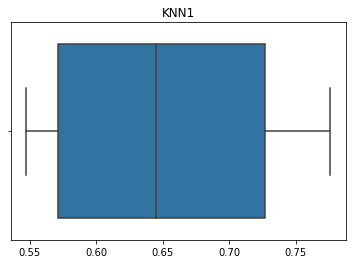

In [64]:
sns.boxplot(knnmodel(knn, X_trains, y_train, X_tests, y_test))
plt.title('KNN')
plt.show()
sns.boxplot(knnmodel(knn1, X_trains, y_train, X_tests, y_test))
plt.title('KNN1')
plt.show()

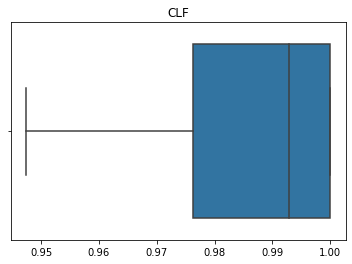

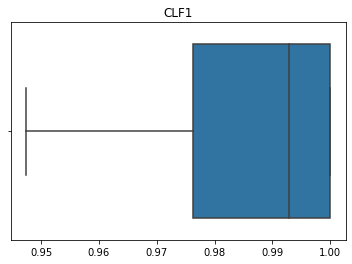

In [65]:
sns.boxplot(algomodel(clf, X_train, y_train, X_test, y_test))
plt.title('CLF')
plt.show()
sns.boxplot(algomodel(clf1, X_train, y_train, X_test, y_test))
plt.title('CLF1')
plt.show()